/var/folders/9_/yhxk9lyd3q14lqgvhpgknhxc0000gn/T/ipykernel_20495/2646322122.py:5: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('experiment.csv')


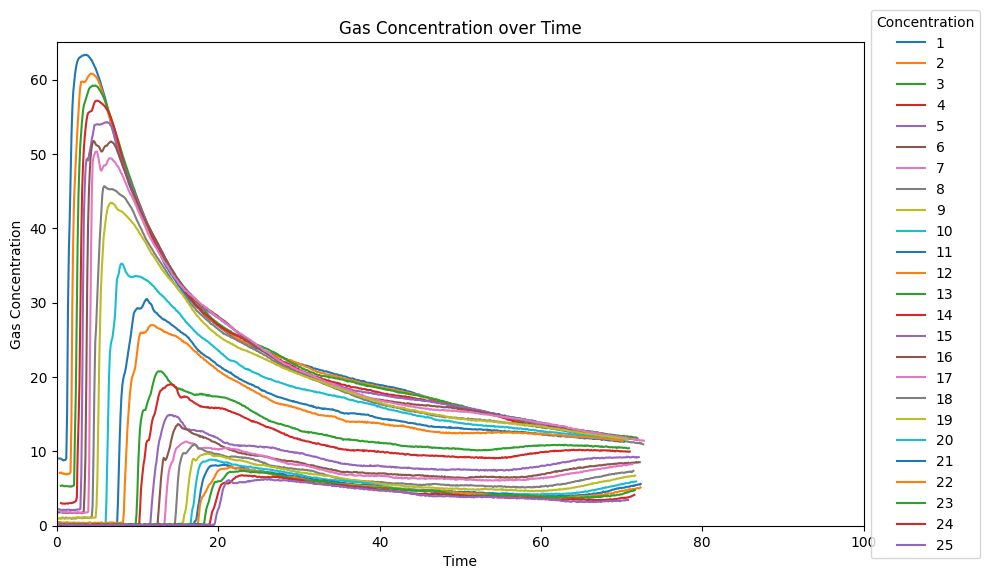

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込みます
df = pd.read_csv('experiment.csv')

# x軸とy軸の範囲を指定（例：適宜変更してください）
x_min, x_max = 0, 100  # x軸の範囲
y_min, y_max = 0, 65  # y軸の範囲

# 'Time'列をx軸として使用し、'1'から'13'の列をy軸としてグラフに表示します
time = pd.to_numeric(df['Time'], errors='coerce')  # Time列を数値に変換し、文字列は欠損値に

# グラフの作成
plt.figure(figsize=(10, 6))
for column in range(1, 28):  # '1'から'13'までの列を繰り返します
    column_name = str(column)  # 列名を文字列に変換します
    if column_name in df.columns:
        # 列を数値に変換し、文字列を欠損値として扱う
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
        
        # 欠損値を含まない部分だけを選択
        valid_data = df[['Time', column_name]].dropna()
        plt.plot(valid_data['Time'], valid_data[column_name], label=column_name)

# 軸の範囲を設定
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# グラフのタイトルとラベルを設定
plt.title('Gas Concentration over Time')
plt.xlabel('Time')
plt.ylabel('Gas Concentration')

# 凡例を右側に配置
plt.legend(title="Concentration", loc='center left', bbox_to_anchor=(1, 0.5))

# グラフを表示
plt.tight_layout()  # レイアウトを調整
plt.show()

In [4]:
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv('experiment.csv')

# 結果を保存するリスト
results = []

# 各列ごとに差分を計算
for column in range(1, 14):  # '1'から'13'までの列を繰り返します
    column_name = str(column)
    if column_name in df.columns:
        # 列を数値に変換し、文字列や無効な値はNaNに
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
        
        # NaNを無視して差分を計算
        valid_data = df[['Time', column_name]].dropna()  # NaNを含む行を除外
        diff_values = valid_data[column_name].diff().abs()  # 前後の差の絶対値を取得

        # 差が3以上の行が見つかったら、その行のTimeを取得して停止
        for i in range(1, len(diff_values)):
            if diff_values.iloc[i] >= 3:
                time_value = valid_data['Time'].iloc[i]
                results.append(f"[Column: {column_name}, Time: {time_value}]")
                break  # 差が3以上を検出したらその列での探索を停止

# 結果を出力
print("差が3以上のTimeのリスト:", results)

差が3以上のTimeのリスト: ['[Column: 1, Time: 1.962630033]', '[Column: 2, Time: 1.719030142]', '[Column: 3, Time: 1.098960161]', '[Column: 4, Time: 1.298310041]', '[Column: 5, Time: 0.545220137]', '[Column: 6, Time: 0.764670134]', '[Column: 7, Time: 2.352250099]', '[Column: 8, Time: 2.709520102]', '[Column: 9, Time: 3.669070005]', '[Column: 10, Time: 3.169729948]', '[Column: 12, Time: 1.04527998]', '[Column: 13, Time: 0.496340036]']


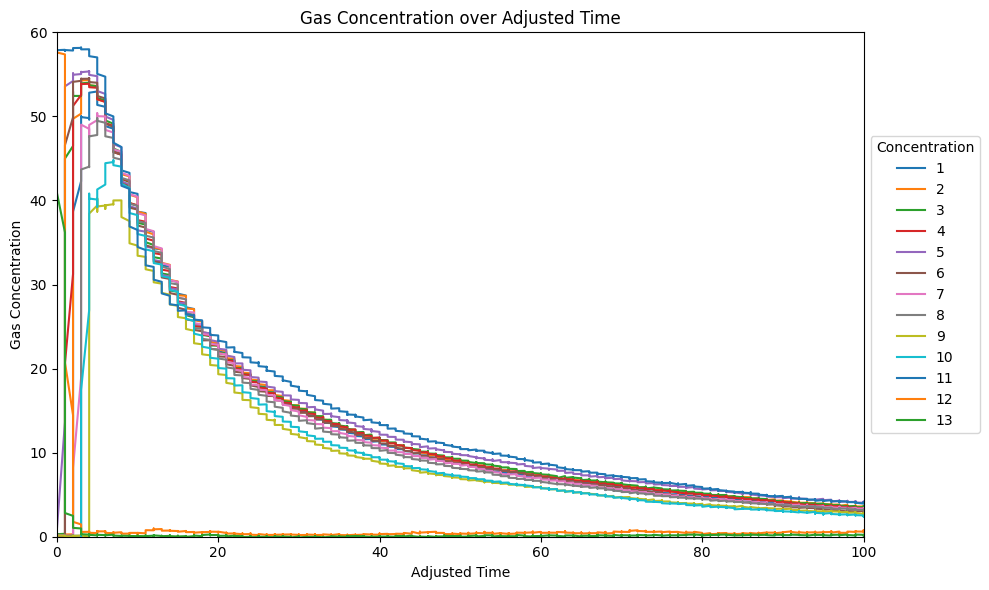

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込みます
df = pd.read_csv('experiment.csv')

# x軸とy軸の範囲を指定（例：適宜変更してください）
x_min, x_max = 0, 100  # x軸の範囲
y_min, y_max = 0, 60   # y軸の範囲

# 'Time'列を数値に変換し、文字列は欠損値として扱う
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# 'Time'列の最小値を求め、それを全ての'Time'値から引く
time_min = df['Time'].min()
df['Adjusted Time'] = df['Time'] - time_min

# グラフの作成
plt.figure(figsize=(10, 6))
for column in range(1, 14):  # '1'から'13'までの列を繰り返します
    column_name = str(column)  # 列名を文字列に変換します
    if column_name in df.columns:
        # 列を数値に変換し、文字列を欠損値として扱う
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
        
        # 欠損値を含まない部分だけを選択
        valid_data = df[['Adjusted Time', column_name]].dropna()
        plt.plot(valid_data['Adjusted Time'], valid_data[column_name], label=column_name)

# 軸の範囲を設定
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# グラフのタイトルとラベルを設定
plt.title('Gas Concentration over Adjusted Time')
plt.xlabel('Adjusted Time')
plt.ylabel('Gas Concentration')

# 凡例を右側に配置
plt.legend(title="Concentration", loc='center left', bbox_to_anchor=(1, 0.5))

# グラフを表示
plt.tight_layout()  # レイアウトを調整
plt.show()

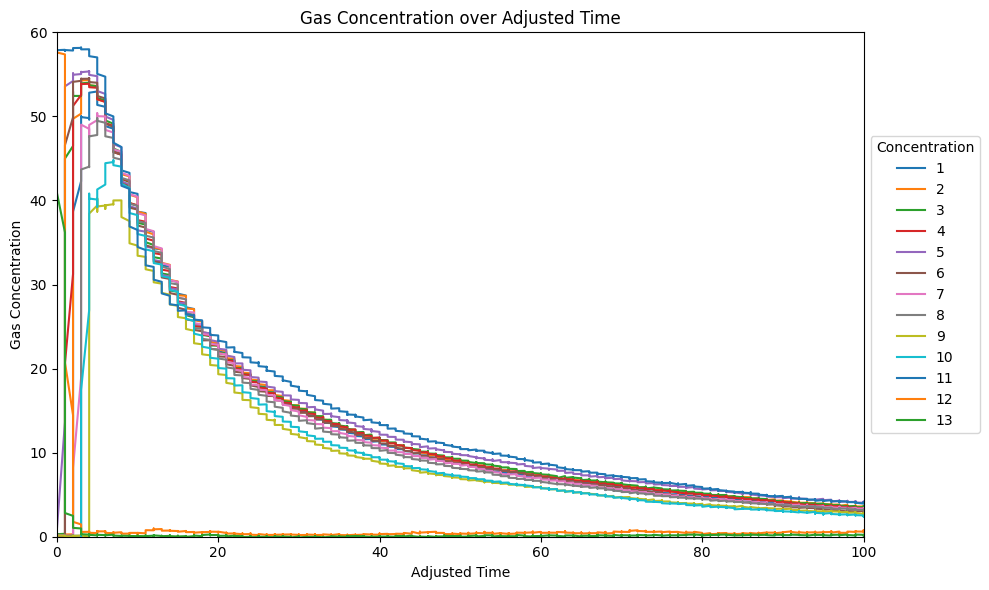

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSVファイルを読み込みます
df = pd.read_csv('experiment.csv')

# 'Time'列を数値に変換し、文字列は欠損値にします
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# 最初の有効な'Time'の値を基準として、全てのTimeの列を引きます
initial_time = df['Time'].dropna().iloc[0]  # 最初のTimeの値
df['Adjusted_Time'] = df['Time'] - initial_time  # Adjusted_Time列を作成

# x軸とy軸の範囲を指定（例：適宜変更してください）
x_min, x_max = 0, 100  # x軸の範囲
y_min, y_max = 0, 60  # y軸の範囲

# グラフの作成
plt.figure(figsize=(10, 6))
for column in range(1, 14):  # '1'から'13'までの列を繰り返します
    column_name = str(column)  # 列名を文字列に変換します
    if column_name in df.columns:
        # 列を数値に変換し、文字列を欠損値として扱う
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
        
        # 欠損値を含まない部分だけを選択
        valid_data = df[['Adjusted_Time', column_name]].dropna()
        plt.plot(valid_data['Adjusted_Time'], valid_data[column_name], label=column_name)

# 軸の範囲を設定
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# グラフのタイトルとラベルを設定
plt.title('Gas Concentration over Adjusted Time')
plt.xlabel('Adjusted Time')
plt.ylabel('Gas Concentration')

# 凡例を右側に配置
plt.legend(title="Concentration", loc='center left', bbox_to_anchor=(1, 0.5))

# グラフを表示
plt.tight_layout()  # レイアウトを調整
plt.show()